<h2> Metabolomic Data using TMap Features <h2>

In [9]:
#In your env, conda install -c conda-forge networkx=2.5
#Data source : https://www.kaggle.com/datasets/sannanybacka/urinary-nmr-metabolomics-from-ibs-patients

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.cluster import DBSCAN
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from tmap.tda.plot import show, Color,tm_plot,vis_progressX
from sklearn import preprocessing 

In [10]:
import warnings
warnings.filterwarnings("ignore")

df=pd.read_excel("Metabolite database.xlsx")

In [11]:
df.head()

,subject,visit,diet,response,14.8437,14.7717,14.7393,14.6931,14.6535,14.6166,...,-4.77425,-4.85038,-4.85932,-4.90839,-4.93246,-4.9745,-5.01424,-5.05299,-5.09709,-5.11803
0,A,1,low-FODMAP,Non-responder,57739200,24936400,21974700,13313200,9027890.0,6887370,...,-812107.0,-107719.0,-289258.0,547306.0,1858110.0,4077610,6638960,11334500,15443200.0,42953800
1,B,1,low-FODMAP,Responder,41568700,18008500,15648600,10222800,6577670.0,3964340,...,-535185.0,-957304.0,240234.0,-157354.0,1857310.0,2434920,5020330,7017350,9121000.0,28177000
2,C,1,low-FODMAP,Responder,33742700,14644200,12036900,7804920,4705410.0,4649260,...,1788840.0,1212120.0,1475820.0,1918470.0,2965390.0,4293840,6502570,9835870,11661700.0,33057800
3,D,1,low-FODMAP,Responder,37675200,15741500,14442900,9398800,6625200.0,4767140,...,-1649860.0,-723272.0,-1333870.0,101807.0,-153581.0,1818750,4368540,7129420,8284590.0,26361200
4,E,1,low-FODMAP,Non-responder,30583500,13315700,11548100,6906810,4412150.0,3499140,...,1730430.0,483134.0,1670550.0,1206250.0,1808100.0,4333530,5381150,9487430,10849200.0,29834400


In [12]:
df_spectras=df.drop(['visit','subject','diet','response'], axis=1)
  
# label_encoder object knows   
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in y. 
y = label_encoder.fit_transform(df['response']) 
X=np.array(df_spectras)

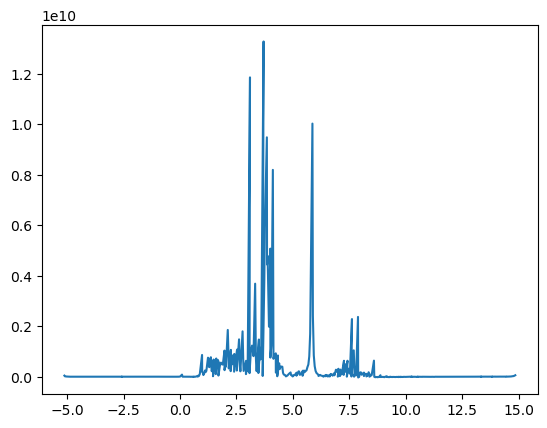

In [13]:
#Plot a sample spectra

import matplotlib.pyplot as plt
plt.plot(np.array(df_spectras.columns), np.array(df_spectras.iloc[0,:])) # Plotting spectra for the first row

<H3> Perform DBScan to identify optimal number of clusters for TDA <H3>

In [12]:
# Initialize DBSCAN clusterer
tm = mapper.Mapper(verbose=1)
# Step2. Projection
lens = [Filter.MDS(components=[0, 1],random_state=100)]
projected_X = tm.filter(X, lens=lens)
projected_X = MinMaxScaler().fit_transform(projected_X)
clusterer = DBSCAN(eps=0.085, min_samples=1) # Adjust hyperparams for better results

# Fit DBSCAN to the projected data
cluster_labels = clusterer.fit_predict(projected_X)

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided euclidean lens.
Filtering has been completed.


In [47]:
cluster_labels

array([ 0,  1,  2,  2,  2,  3,  2,  4,  2,  2,  5,  2,  2,  2,  2,  1,  2,
        2,  1,  2,  3,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  1,  1,  2,
        0,  2,  2,  2,  2,  2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,  6,
        7,  2,  2,  2,  2,  2,  1,  2,  2,  2,  6,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  8,  2,  2,  1,  2,  4,  2,  2,  2,
        9,  2,  2,  2,  2,  1,  2, 10,  2,  2,  2,  2,  2, 11,  2,  2, 12,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [37]:
from collections import defaultdict

# Group data points by their DBSCAN cluster labels
clusters = defaultdict(list)

# Add each point (or its index) to the corresponding cluster
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

# Convert to a list of lists
cluster_lists = list(clusters.values())

# Print out the clusters
for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")

Cluster 0: [0, 34]
Cluster 1: [1, 15, 18, 31, 32, 57, 79, 90]
Cluster 2: [2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 82, 83, 84, 86, 87, 88, 89, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]
Cluster 3: [5, 20]
Cluster 4: [7, 23, 81]
Cluster 5: [10, 43]
Cluster 6: [50, 61]
Cluster 7: [51]
Cluster 8: [76]
Cluster 9: [85]
Cluster 10: [92]
Cluster 11: [98]
Cluster 12: [101]


In [38]:
from collections import defaultdict

# Group data points by their DBSCAN cluster labels
clusters = defaultdict(list)

# Add each point (or its index) to the corresponding cluster
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

# Convert to a list of lists
cluster_lists = list(clusters.values())

# Print out the clusters
for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")

Cluster 0: [0, 34]
Cluster 1: [1, 15, 18, 31, 32, 57, 79, 90]
Cluster 2: [2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 82, 83, 84, 86, 87, 88, 89, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]
Cluster 3: [5, 20]
Cluster 4: [7, 23, 81]
Cluster 5: [10, 43]
Cluster 6: [50, 61]
Cluster 7: [51]
Cluster 8: [76]
Cluster 9: [85]
Cluster 10: [92]
Cluster 11: [98]
Cluster 12: [101]


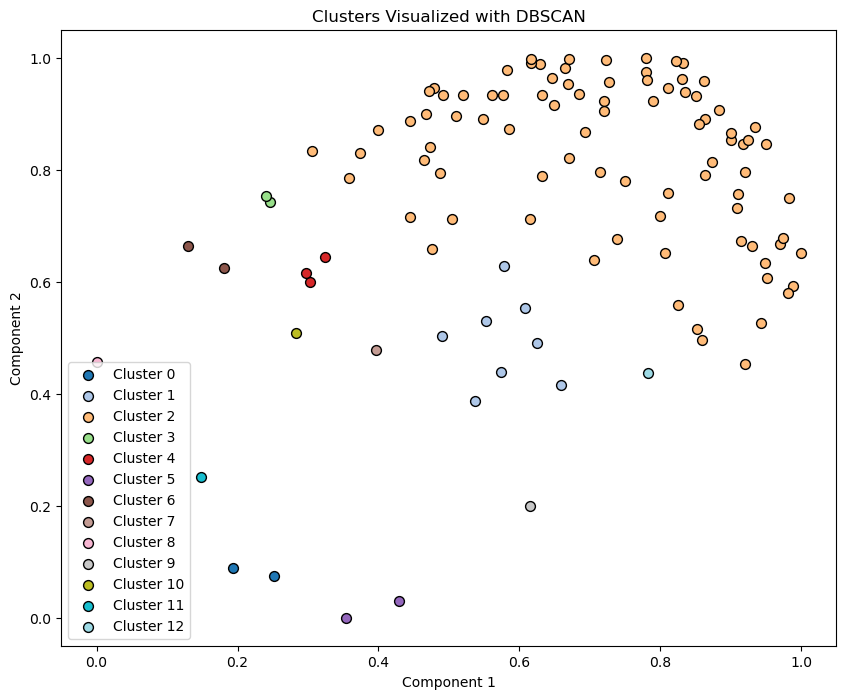

In [39]:
# Step 4: Define the colors for clusters
unique_labels = set(cluster_labels)
colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Get a colormap with enough colors

# Step 5: Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 8))

# Plot each cluster
for label in unique_labels:
    # Get the points corresponding to the current cluster label
    cluster_points = projected_X[cluster_labels == label]
    
    # Choose a color for the cluster
    color = colors(label) if label != -1 else 'black'  # Use black for outliers (-1)
    
    # Plot the points for this cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}", color=color, s=50, edgecolors='k')

# Add labels and title
plt.title('Clusters Visualized with DBSCAN')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

<h3> Perform TDA <h3>

In [17]:
# Define filter function

# TDA magic
import umap

from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

filter_func = umap.UMAP(n_neighbors=5) 
# Define cover
cover = CubicalCover(kind='balanced', n_intervals=10, overlap_frac=0.2)
# Choose clustering algorithm 
clusterer = DBSCAN(eps=0.085)
# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=True,
    n_jobs=-1,
)
# Plot Mapper graph
fig = plot_static_mapper_graph(pipe, X)
fig.show(config={'scrollZoom': True})

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.2s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s
